# EC7212 – Computer Vision and Image Processing

## Take Home Assignment 1

#### Name: Kulasooriya K.S.P.
#### Reg No: EG/2020/4329

In [23]:
# Import Libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

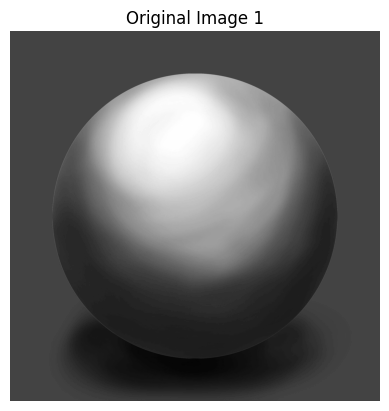

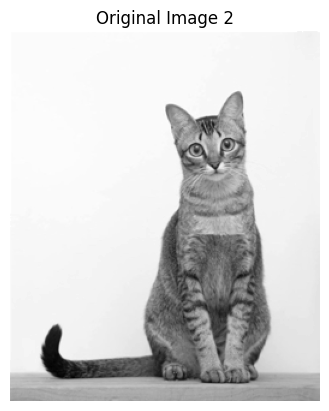

In [24]:
# Load the image
image_path = 'input1.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.title("Original Image 1")
plt.axis('off')
plt.show()

image_path = 'input.png'
img1 = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray')
plt.title("Original Image 2")
plt.axis('off')
plt.show()

In [25]:
# Create output folder
import os
import cv2
import glob
os.makedirs("output", exist_ok=True)

files = glob.glob("output/*")
for f in files:
    os.remove(f)

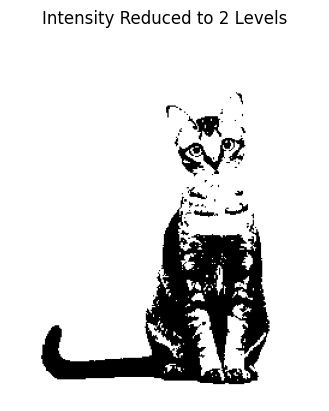

True

In [26]:
# 1. Reduce Intensity Levels to 2 (powers of 2)

def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced = (image // factor) * factor
    return reduced

desired_levels = 2
reduced_img = reduce_intensity_levels(img1, desired_levels)

plt.imshow(reduced_img, cmap='gray')
plt.title(f"Intensity Reduced to {desired_levels} Levels")
plt.axis('off')
plt.show()

# save output
cv2.imwrite('output/q1_reduced.png', reduced_img)

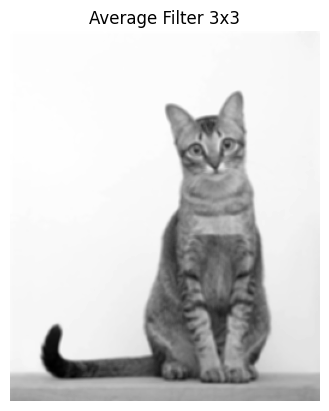

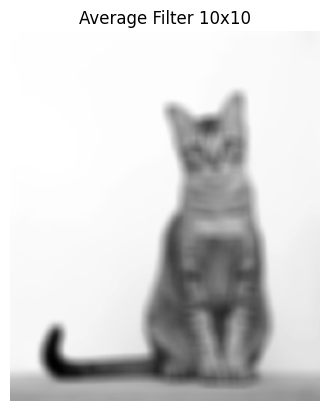

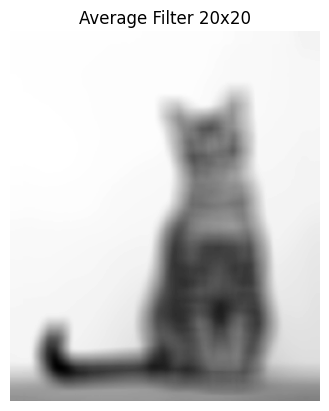

In [27]:
# 2. Apply Average Filtering of 3×3, 10×10 and 20×20
def average_filter(image, ksize):
    return cv2.blur(image, (ksize, ksize))

ksizes = [3, 10, 20]
for k in ksizes:
    avg_img = average_filter(img1, k)
    plt.imshow(avg_img, cmap='gray')
    plt.title(f"Average Filter {k}x{k}")
    plt.axis('off')
    plt.show()
   
    # save output
    filename = f"output/q2_average_filter_{k}x{k}.png"
    cv2.imwrite(filename, avg_img)

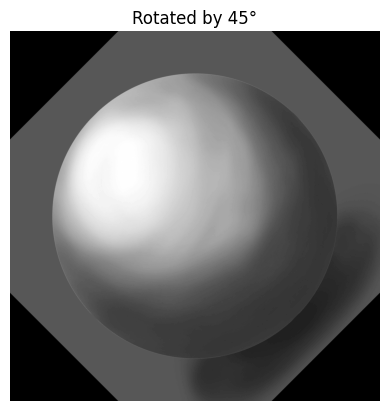

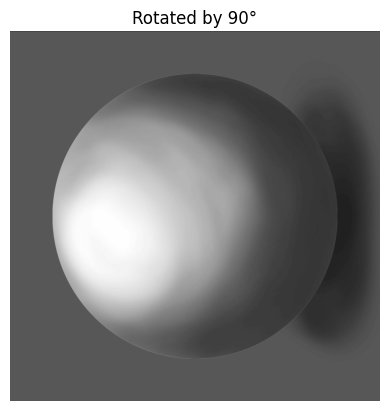

In [28]:
# 3. Rotate Image for 45° and 90°
def rotate_image(image, angle):
    (h, w) = image.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# plot the image
angles = [45, 90]
for angle in angles:
    rotated = rotate_image(img, angle)
    plt.imshow(rotated, cmap='gray')
    plt.title(f"Rotated by {angle}°")
    plt.axis('off')
    plt.show()
   
   # save output
    filename = f"output/q3_rotated_{angle}deg.png"
    cv2.imwrite(filename, rotated)

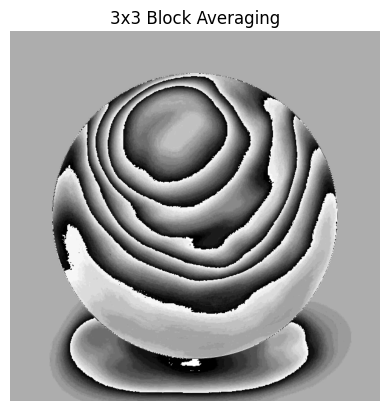

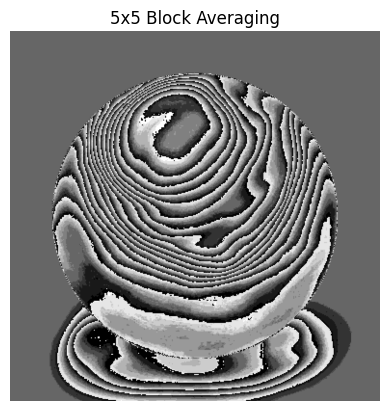

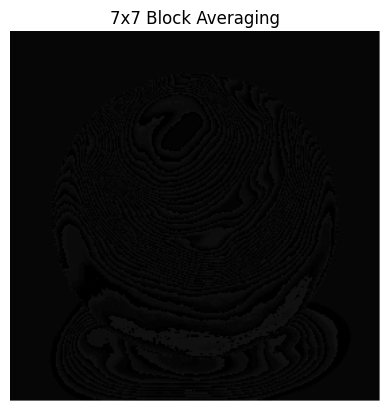

In [29]:
# 4. Replacing the blocks by their average (3×3, 5×5 and 7×7 blocks)
def block_average(image, block_size):
    h, w = image.shape
    new_img = image.copy()
    for y in range(0, h - block_size + 1, block_size):
        for x in range(0, w - block_size + 1, block_size):
            block = image[y:y+block_size, x:x+block_size]
            avg = np.mean(block, dtype=np.uint8)
            new_img[y:y+block_size, x:x+block_size] = avg
    return new_img

block_sizes = [3, 5, 7]
for size in block_sizes:
    block_img = block_average(img, size)
    plt.imshow(block_img, cmap='gray')
    plt.title(f"{size}x{size} Block Averaging")
    plt.axis('off')
    plt.show()

    # Save outputs
    filename = f"output/q4_block_average_{size}x{size}.png"
    cv2.imwrite(filename, block_img)
